# Import Libraries

In [507]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder , StandardScaler 
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib

# Insert Data

In [508]:
data = pd.read_csv(r"D:\Courses\Projects\Housing Price\AmesHousing.csv")
df = pd.DataFrame(data)
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


# Data Review

In [509]:
df = df.drop(columns=["Order"])
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [511]:
df.drop(columns=["Alley" , "Pool QC" , "Fence" , "Misc Feature" , "Mas Vnr Type" , "Fireplace Qu"] , inplace=True)
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [512]:
df.drop_duplicates(inplace=True)

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

In [514]:
df.isna().sum().head(50)

PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fi

In [515]:
df.isna().sum().tail(27)

Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces          0
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Cars         1
Garage Area         1
Garage Qual       159
Garage Cond       159
Paved Drive         0
Wood Deck SF        0
Open Porch SF       0
Enclosed Porch      0
3Ssn Porch          0
Screen Porch        0
Pool Area           0
Misc Val            0
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
dtype: int64

# Data Preprocessing

In [516]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
        df[col] = le.fit_transform(df[col])

In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   int64  
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   int64  
 6   Lot Shape        2930 non-null   int64  
 7   Land Contour     2930 non-null   int64  
 8   Utilities        2930 non-null   int64  
 9   Lot Config       2930 non-null   int64  
 10  Land Slope       2930 non-null   int64  
 11  Neighborhood     2930 non-null   int64  
 12  Condition 1      2930 non-null   int64  
 13  Condition 2      2930 non-null   int64  
 14  Bldg Type        2930 non-null   int64  
 15  House Style      2930 non-null   int64  
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

In [518]:
df.isna().sum().head(50)

PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual            0
Bsmt Cond            0
Bsmt Exposure        0
BsmtFin Type 1       0
BsmtFin SF 1         1
BsmtFin Type 2       0
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fi

In [519]:
df.isna().sum().tail(27)

Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces          0
Garage Type         0
Garage Yr Blt     159
Garage Finish       0
Garage Cars         1
Garage Area         1
Garage Qual         0
Garage Cond         0
Paved Drive         0
Wood Deck SF        0
Open Porch SF       0
Enclosed Porch      0
3Ssn Porch          0
Screen Porch        0
Pool Area           0
Misc Val            0
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
dtype: int64

In [520]:
for col in df.columns:
    if df[col].dtype != "object":
        if (col in df.isnull().sum()) != 0:
            df[col] = df[col].fillna(df[col].median())

In [521]:
df.isna().sum().head(50)

PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath    

In [522]:
df.isna().sum().tail(27)

Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Wood Deck SF      0
Open Porch SF     0
Enclosed Porch    0
3Ssn Porch        0
Screen Porch      0
Pool Area         0
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
dtype: int64

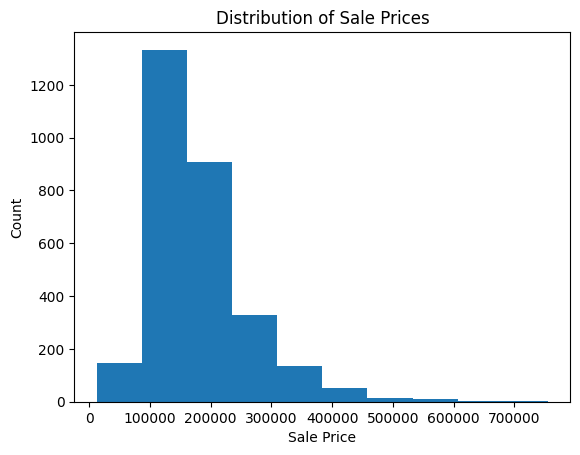

In [523]:
plt.hist(df["SalePrice"])
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Distribution of Sale Prices")
plt.show()

In [524]:
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df) , columns= df.columns)

In [525]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,-0.997164,-0.877005,0.037856,3.375742,2.744381,0.064128,-1.374263,0.316016,-0.030805,-1.905212,...,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,1.678499,0.34164,0.204566,0.428229
1,-0.996904,-0.877005,-1.117540,0.514952,0.187097,0.064128,0.750587,0.316016,-0.030805,0.589101,...,-0.358838,-0.103134,1.854530,-0.063031,-0.089422,-0.079602,1.678499,0.34164,0.204566,-0.948957
2,-0.996899,-0.877005,0.037856,0.561850,0.522814,0.064128,-1.374263,0.316016,-0.030805,-1.905212,...,-0.358838,-0.103134,-0.285354,-0.063031,21.985725,-0.079602,1.678499,0.34164,0.204566,-0.110125
3,-0.996888,-0.877005,0.037856,1.124628,0.128458,0.064128,0.750587,0.316016,-0.030805,-1.905212,...,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499,0.34164,0.204566,0.791305
4,-0.992903,0.061285,0.037856,0.233563,0.467348,0.064128,-1.374263,0.316016,-0.030805,0.589101,...,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,1.678499,0.34164,0.204566,0.113980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1.106582,0.530430,0.037856,-1.501671,-0.280621,0.064128,-1.374263,0.316016,-0.030805,-1.281634,...,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,-1.360118,0.34164,0.204566,-0.479462
2926,1.106588,-0.877005,0.037856,-0.047827,-0.160296,0.064128,-1.374263,-1.106299,-0.030805,0.589101,...,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.079602,-1.360118,0.34164,0.204566,-0.623440
2927,1.107245,0.647716,0.037856,-0.329216,0.037199,0.064128,0.750587,0.316016,-0.030805,0.589101,...,-0.358838,-0.103134,-0.285354,-0.063031,1.146786,0.288854,-1.360118,0.34164,0.204566,-0.610920
2928,1.110954,-0.877005,0.037856,0.374257,-0.017506,0.064128,0.750587,0.316016,-0.030805,0.589101,...,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,-1.360118,0.34164,0.204566,-0.135165


# Importance of Features

In [526]:
x = df.drop('SalePrice' , axis=1)
y = df["SalePrice"]

model = XGBRegressor()
model.fit(x , y)

importance = pd.Series(model.feature_importances_ , index=x.columns).sort_values(ascending=False)
importance.head(20)

Overall Qual       0.517012
Garage Cars        0.095030
Central Air        0.057230
Bsmt Qual          0.045874
Gr Liv Area        0.034874
Garage Type        0.025373
Kitchen Qual       0.022328
Total Bsmt SF      0.016924
Fireplaces         0.015663
Land Contour       0.013051
1st Flr SF         0.010216
Bsmt Full Bath     0.009859
2nd Flr SF         0.009623
Low Qual Fin SF    0.008069
BsmtFin SF 1       0.007573
Year Remod/Add     0.007167
MS Zoning          0.006300
Screen Porch       0.006222
Exter Qual         0.006088
Full Bath          0.005654
dtype: float32

# Splite Data

In [527]:
selected_features = [
    'Overall Qual', 'Garage Cars', 'Central Air', 'Bsmt Qual',
    'Gr Liv Area', 'Garage Type', 'Kitchen Qual', 'Total Bsmt SF',
    'Fireplaces', 'Land Contour', '1st Flr SF'
]

In [528]:
x = df[selected_features]
y = df["SalePrice"]

In [529]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.3 , random_state=43) 

# Model Train

In [530]:
model = XGBRegressor()

params = {
    'max_depth': range(3 , 6 , 1),
    'learning_rate': [0.05 , 0.1],
    'n_estimators': [200, 500]
}


grid = GridSearchCV(model , params , scoring='neg_root_mean_squared_error' , cv = 5)
grid.fit(x_train, y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'learning_rate': [0.05, 0.1], 'max_depth': range(3, 6), 'n_estimators': [200, 500]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [531]:
print("Best Parameters:", grid.best_params_)
print("Best Score (neg RMSE):", grid.best_score_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
Best Score (neg RMSE): -0.35580709191764476


# Best Model Training

In [532]:
best_model = XGBRegressor(
    learning_rate=0.05,
    max_depth=3,
    n_estimators=500,
)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Evaluate Model

In [533]:

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 0.2224
RMSE: 0.3299
R²: 0.8825


# Save Model

In [534]:
joblib.dump(best_model , 'house_price_model.pkl')
joblib.dump(sc , 'scaler.pkl')

['scaler.pkl']